# Churn (loss of customers to competition):
A problem for telecom companies because it is more expensive to acquire a new customer than to keep your existing one from leaving.


The Business Pain:


* Most telecom companies suffer from voluntary churn. Churn rate has strong impact on the life time value of the customer because it affects the length of service and the future revenue of the company. 
* It is estimated that 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year are coming from another wireless provider, which means they are churners. 
* Telecom companies spend hundreds of dollars to acquire a new customer and when that customer leaves, the company not only loses the future revenue from that customer but also the resources spend to acquire that customer. 


#### Churn  erodes profitability


Churn costs AT&T, Verizon, Comcast and Time Warner Cable billions
of dollars every year.

• Roughly 75% of the subscribers signing up every year come from another 
network—they are already churners.

• The churn rate in developing markets ranges from 20% to 70%. In some
of these markets more than 90% of all mobile subscribers are on prepaid
service. Some operators in developing markets lose in aggregate their
entire subscriber base to churn in a year.

### Contents of the Dataset:

* State : Code of the States in USA.
* Account Length : Duration of the account.
* Area Code  : Area code of the subscriber.
* Int'l Plan : Subscribed to international plan.
* VMail Plan : Subscribed to voice mail plan.
* VMail Message : Number of voice mail messages.
* Day Mins  : Number of calling minutes during day.
* Day Calls : Number of calls during day.
* Day Charge : Charges during day.
* Eve Mins : Number of calling minutes during evening.
* Eve Calls : Number of calls during evening.
* Eve Charge : Charges during evening.
* Night Mins : Number of calling minutes during night.
* Night Calls : Number of calls during night.
* Night Charge : Charges during night.
* Intl Mins : Number of international calling minutes.
* Intl Calls : Number of international calls.
* Intl Charge : Charges from international calls.
* CustServ Calls : Customer service calls made.
* Churn? : Churned, yes or no!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

In [2]:
# Creating the INPUT FOLDER which will contain our input files!
INPUT_FOLDER='C:/TRIALS/Telco/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
    if 'zip' not in f:
       print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
Customer_Curn_Telco1.txt      437.9 KB
states.twb                    47.81 KB
TELCO.html                    539.53 KB
TELCO.ipynb                   269.83 KB


In [3]:
data=pd.read_csv(INPUT_FOLDER + 'Customer_Curn_Telco1.txt')

In [4]:
#Looking at the rows X columns of our dataset.
data.shape

(3333, 21)

In [5]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
data['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [8]:
len(data['State'].unique())

51

In [9]:
l1=list(data['State'])
from collections import Counter
l2=Counter(l1)

key = l2.keys()

df = pd.DataFrame(l2,index=key)
df.drop(df.columns[1:], inplace=True)

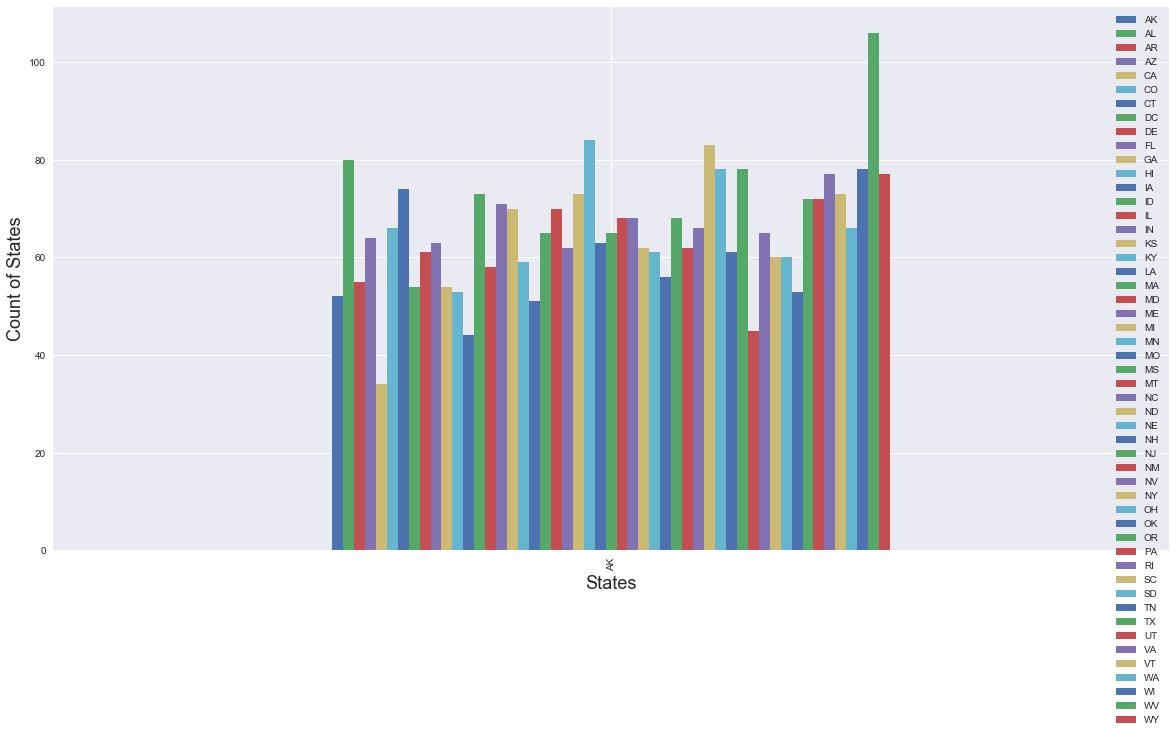

In [10]:
df.plot(kind='bar', figsize=(20,10))
plt.xlabel('States', fontsize=18)
plt.ylabel('Count of States', fontsize=18)
plt.show()

In [11]:
states=data.groupby("State").size()

In [12]:
states

State
AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
dtype: int64

In [13]:
data["Int'l Plan"].unique()

array(['no', 'yes'], dtype=object)

In [14]:
intl_plan=data.groupby("Int'l Plan").size()

In [15]:
intl_plan

Int'l Plan
no     3010
yes     323
dtype: int64

In [16]:
print ("Not subscribed to intl_plan in percent:\t{}".format((intl_plan["no"]/3333)*100))
print ("Subscribed to intl_plan in percent:\t{}".format((intl_plan["yes"]/3333)*100))

Not subscribed to intl_plan in percent:	90.3090309030903
Subscribed to intl_plan in percent:	9.69096909690969


In [17]:
len(data['Phone'].unique())

3333

In [18]:
Account_length=data.groupby('Account Length')

In [19]:
VMail_Plan=data.groupby('VMail Plan').size()

In [20]:
VMail_Plan

VMail Plan
no     2411
yes     922
dtype: int64

In [21]:
print ("Not subscribed to VMail_Plan in percent:{}".format((VMail_Plan["no"]/3333)*100))
print ("Subscribed to VMail_Plan in percent:\t{}".format((VMail_Plan["yes"]/3333)*100))

Not subscribed to VMail_Plan in percent:72.33723372337234
Subscribed to VMail_Plan in percent:	27.662766276627664


In [22]:
CustServ_Calls=data.groupby('CustServ Calls').size()

In [23]:
CustServ_Calls

CustServ Calls
0     697
1    1181
2     759
3     429
4     166
5      66
6      22
7       9
8       2
9       2
dtype: int64

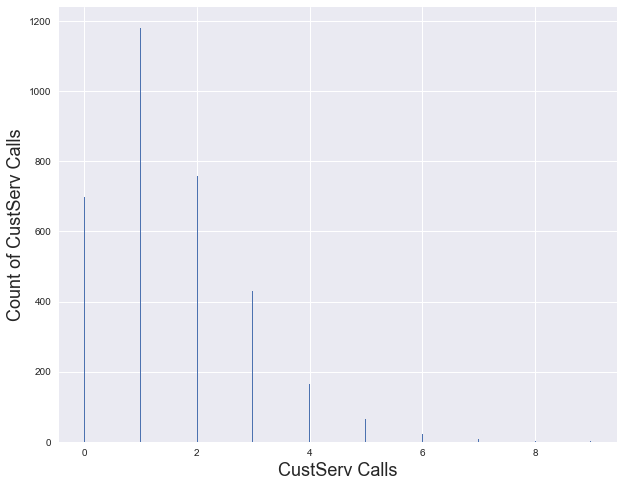

In [24]:
data["CustServ Calls"].hist(bins=500,figsize=(10,8))
plt.xlabel('CustServ Calls', fontsize=18)
plt.ylabel('Count of CustServ Calls', fontsize=18)
plt.show()

In [25]:
Area_Code= data.groupby(['Area Code']).size()

In [26]:
Area_Code

Area Code
408     838
415    1655
510     840
dtype: int64

In [27]:
Account_Length= data["Account Length"]

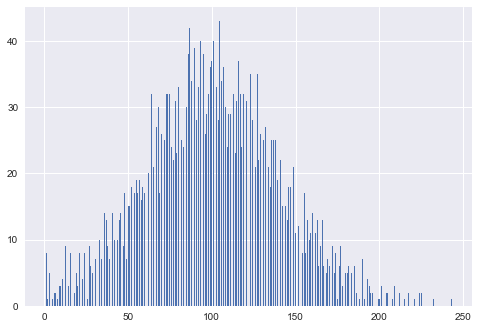

In [28]:
import matplotlib
matplotlib.pyplot.hist(Account_Length, bins=500)
plt.show()

In [29]:
Churn=data.groupby('Churn?').size()

In [30]:
Churn

Churn?
False.    2850
True.      483
dtype: int64

In [31]:
print (" Negative Chrun in percent:{}".format((Churn["False."]/3333)*100))
print (" Positive Chrun in percent:{}".format((Churn["True."]/3333)*100))

 Negative Chrun in percent:85.5085508550855
 Positive Chrun in percent:14.491449144914492


In [32]:
State_Churn=data.groupby(['State', 'Churn?']).size()

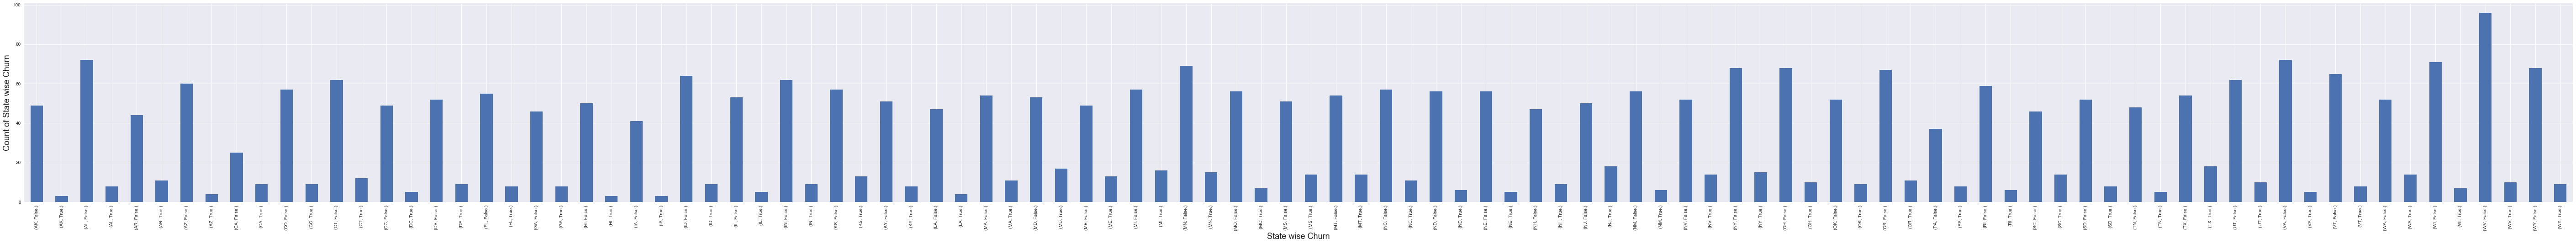

In [33]:
State_Churn.plot( kind= 'bar', figsize=(100,8))
plt.xlabel('State wise Churn', fontsize=18)
plt.ylabel('Count of State wise Churn', fontsize=18)
plt.show()

In [34]:
Intl_Churn=data.groupby(["Int'l Plan", 'Churn?']).size()

In [35]:
Intl_Churn

Int'l Plan  Churn?
no          False.    2664
            True.      346
yes         False.     186
            True.      137
dtype: int64

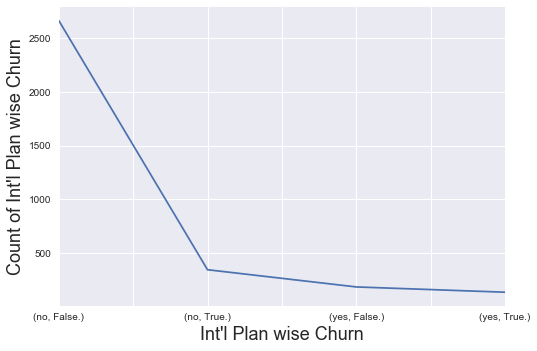

In [36]:
Intl_Churn.plot()
plt.xlabel("Int'l Plan wise Churn", fontsize=18)
plt.ylabel("Count of Int'l Plan wise Churn", fontsize=18)
plt.show()

In [37]:
a=print ("No Intl_plan and Chrun in percent:{}".format((Intl_Churn["no"]/intl_plan['no'])*100))
print ('\n----------------------------------------\n')
b=print ("Intl_plan and Chrun in percent:{}".format((Intl_Churn["yes"]/intl_plan['yes'])*100))

No Intl_plan and Chrun in percent:Churn?
False.    88.504983
True.     11.495017
dtype: float64

----------------------------------------

Intl_plan and Chrun in percent:Churn?
False.    57.585139
True.     42.414861
dtype: float64


In [38]:
import seaborn as sns
sns.set_style("whitegrid")

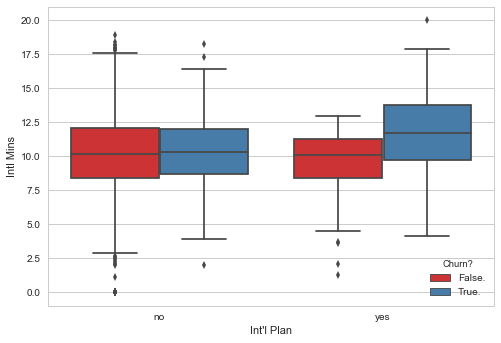

In [39]:
ax = sns.boxplot(x="Int'l Plan", y="Intl Mins", hue="Churn?", data=data, palette="Set1")
sns.plt.show()

In [40]:
bins = [0, 12, 24, 48, 60, 72, 84, 96, 108, 120, 132, 144, 168, 180, 192, 204, 216, 228, 240, 252]

categories = pd.cut(Account_Length, bins)

In [41]:
Account_Churn=data.groupby([categories, "Churn?"]).size()

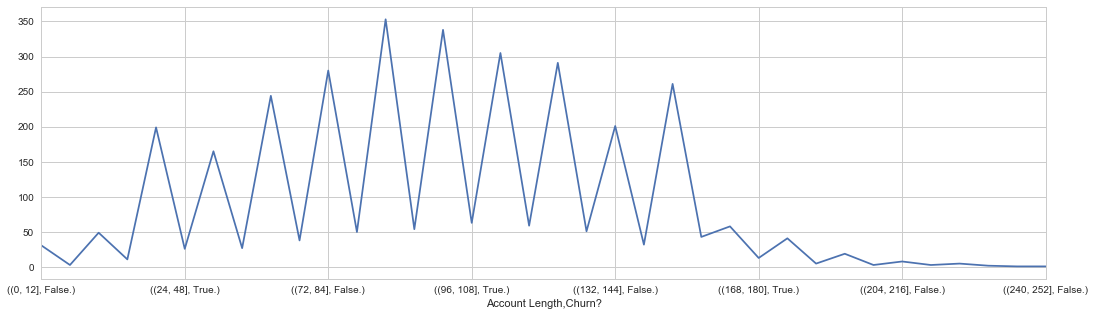

In [42]:
Account_Churn.plot(figsize=(18,5))
plt.show()

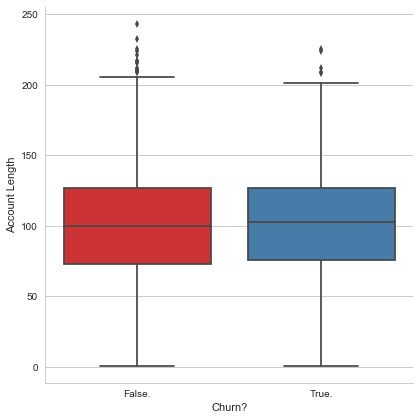

In [43]:
g = sns.factorplot(y="Account Length", x="Churn?", data=data,
                   size=6, kind="box", palette="Set1")
sns.plt.show()

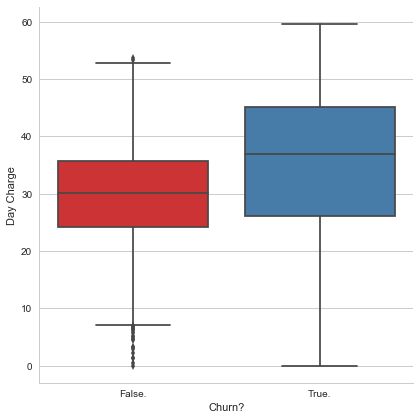

In [44]:
g = sns.factorplot(y="Day Charge", x="Churn?", data=data,
                   size=6, kind="box", palette="Set1")
sns.plt.show()

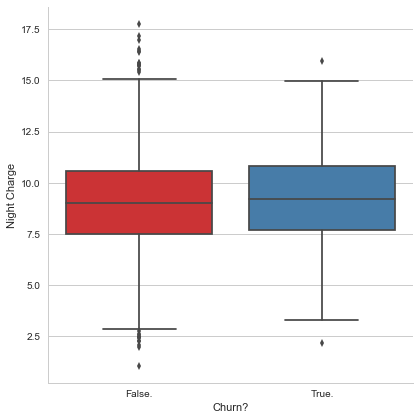

In [45]:
g = sns.factorplot(y="Night Charge", x="Churn?", data=data,
                   size=6, kind="box", palette="Set1")
sns.plt.show()

In [46]:
VMail_Churn=data.groupby(['VMail Plan', 'Churn?']).size()

In [47]:
VMail_Churn 

VMail Plan  Churn?
no          False.    2008
            True.      403
yes         False.     842
            True.       80
dtype: int64

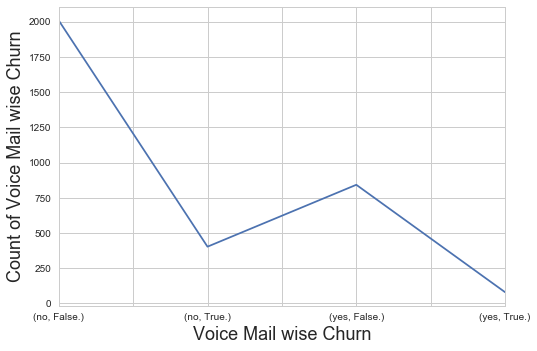

In [48]:
VMail_Churn.plot()
plt.xlabel('Voice Mail wise Churn', fontsize=18)
plt.ylabel('Count of Voice Mail wise Churn', fontsize=18)
plt.show()

In [49]:
print ("No VMail Plan and Chrun in percent:{}".format((VMail_Churn["no"]/VMail_Plan['no'])*100))
print ('\n----------------------------------------\n')
print ("VMail Plann and Chrun in percent:{}".format((VMail_Churn["yes"]/VMail_Plan['yes'])*100))

No VMail Plan and Chrun in percent:Churn?
False.    83.284944
True.     16.715056
dtype: float64

----------------------------------------

VMail Plann and Chrun in percent:Churn?
False.    91.32321
True.      8.67679
dtype: float64


In [50]:
Custserv_Chrun=data.groupby(['CustServ Calls','Churn?']).size()

In [51]:
Custserv_Chrun

CustServ Calls  Churn?
0               False.     605
                True.       92
1               False.    1059
                True.      122
2               False.     672
                True.       87
3               False.     385
                True.       44
4               False.      90
                True.       76
5               False.      26
                True.       40
6               False.       8
                True.       14
7               False.       4
                True.        5
8               False.       1
                True.        1
9               True.        2
dtype: int64

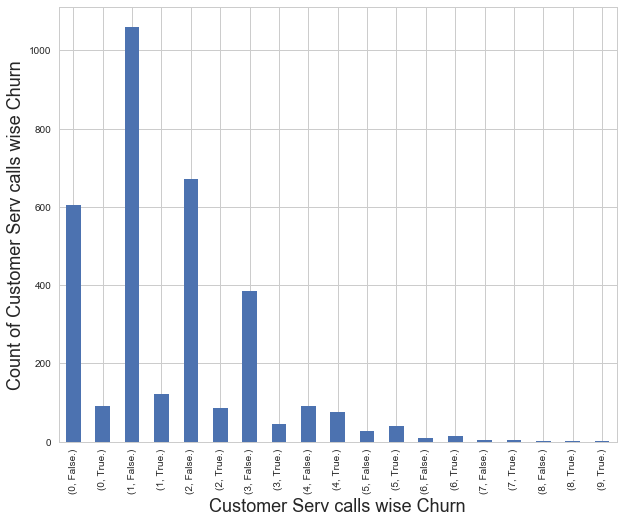

In [52]:
Custserv_Chrun.plot(kind= 'bar', figsize=(10,8))
plt.xlabel('Customer Serv calls wise Churn', fontsize=18)
plt.ylabel('Count of Customer Serv calls wise Churn', fontsize=18)
plt.show()

In [53]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


##### Replacing the string columns with int values:
    No replaced with 0
    Yes replaced with 1

In [54]:
data["Int'l Plan"].replace(['no','yes'],[0,1],inplace=True)

In [55]:
data["Churn?"].replace(['False.', 'True.'], [0, 1], inplace=True)

In [56]:
data["VMail Plan"].replace(['no', 'yes'], [0, 1], inplace=True)

##### Removing the Phone Number Column.

In [57]:
data=data.drop("Phone",1)

In [58]:
from sklearn.model_selection import train_test_split
X = data.ix[:,1:19]
Y = data["Churn?"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

C:\Users\AS186194\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [59]:
len(X_train)

2333

In [60]:
len(X_test)

1000

In [61]:
len(Y_train)

2333

In [62]:
len(Y_test)

1000

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

#random forest

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [64]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())
    

LR 0.863262536224
LDA 0.856393749312
KNN 0.87355562892
CART 0.911705366641
RF 0.93784710759
NB 0.863689886651
SVM 0.854266167785


In [65]:
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)
predictions_RF = RF.predict(X_test)

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [67]:
print("Accuracy Score is:")
print(accuracy_score(Y_test, predictions_RF))
print()

Accuracy Score is:
0.93



In [68]:
print("Classification Report:")
print(classification_report(Y_test, predictions_RF))

Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       857
          1       0.85      0.62      0.72       143

avg / total       0.93      0.93      0.93      1000



In [69]:
conf = confusion_matrix(Y_test,predictions_RF)

In [70]:
conf

array([[842,  15],
       [ 55,  88]])

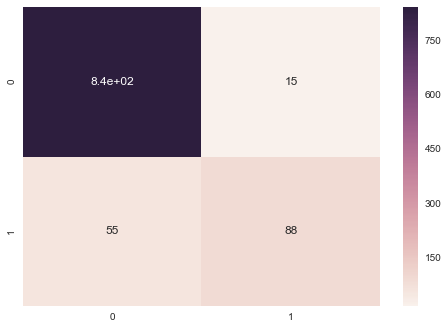

In [71]:
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()